<a href="https://colab.research.google.com/github/DomnicBlinda/DEEP-LEARNING-PROJECT/blob/main/IMAGE%20CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("✅ Libraries Loaded - TensorFlow Version:", tf.__version__)


✅ Libraries Loaded - TensorFlow Version: 2.18.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/tmp/ipython-input-2151656813.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


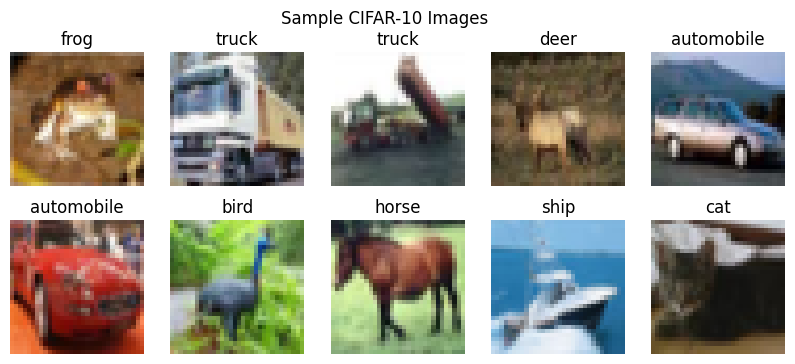

In [2]:
# STEP 2: Load and Preprocess CIFAR-10 Dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Images")
plt.show()


In [3]:
# STEP 3: Build CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# STEP 4: Train the Model

history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=64
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.2638 - loss: 1.9644 - val_accuracy: 0.4994 - val_loss: 1.3828
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.4839 - loss: 1.4289 - val_accuracy: 0.5685 - val_loss: 1.2321
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.5432 - loss: 1.2807 - val_accuracy: 0.5968 - val_loss: 1.1279
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.5806 - loss: 1.1843 - val_accuracy: 0.6155 - val_loss: 1.0722
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.6137 - loss: 1.0992 - val_accuracy: 0.6513 - val_loss: 0.9909
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.6367 - loss: 1.0342 - val_accuracy: 0.6442 - val_loss: 1.0204
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6544 - loss: 0.9906 - val_accuracy: 0.6803 - val_loss: 0.9098
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6720 - loss: 0.9467 - 

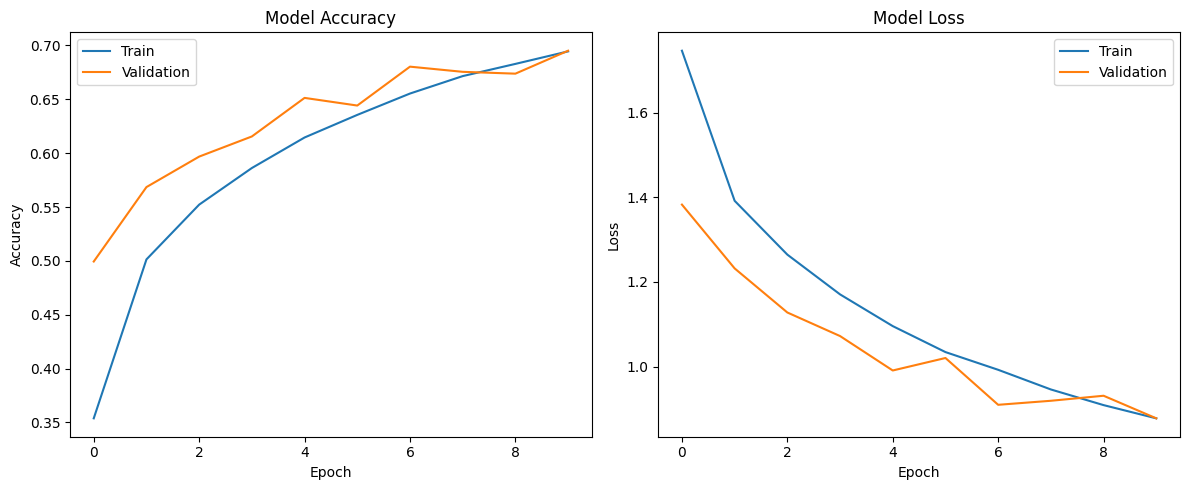

In [5]:
# STEP 5: Plot Accuracy and Loss

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


313/313 - 6s - 20ms/step - accuracy: 0.6951 - loss: 0.8778

✅ Test Accuracy: 0.6951
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step

Classification Report:

              precision    recall  f1-score   support

    airplane       0.76      0.74      0.75      1000
  automobile       0.85      0.80      0.82      1000
        bird       0.55      0.61      0.58      1000
         cat       0.49      0.55      0.52      1000
        deer       0.66      0.62      0.64      1000
         dog       0.68      0.46      0.55      1000
        frog       0.75      0.77      0.76      1000
       horse       0.75      0.72      0.73      1000
        ship       0.77      0.85      0.81      1000
       truck       0.73      0.83      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



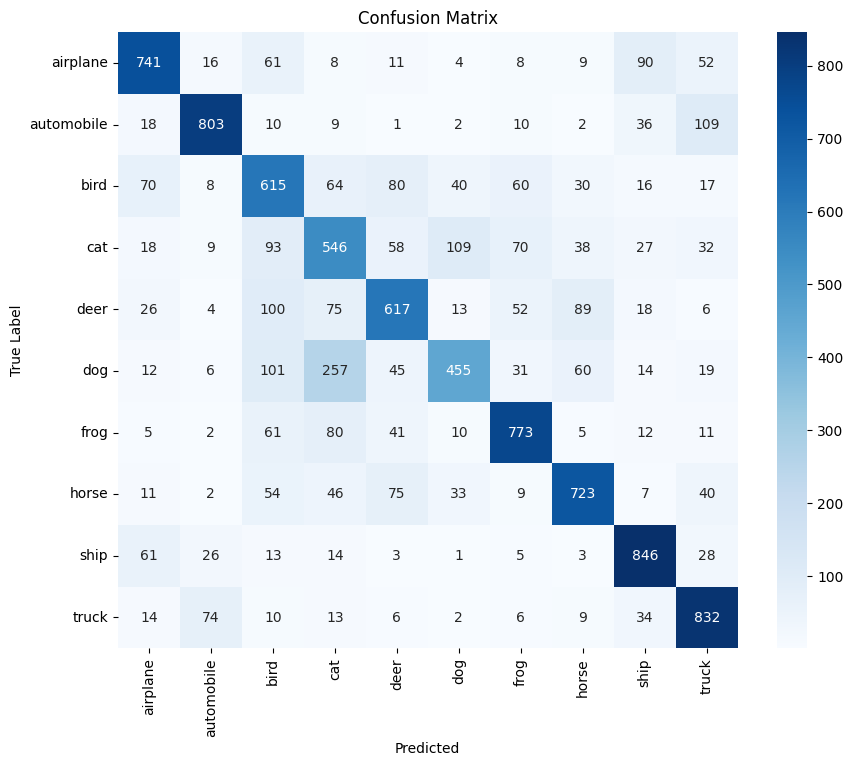

In [7]:
# STEP 6: Evaluate and Predict

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


/tmp/ipython-input-2051197800.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(y_test[i])]


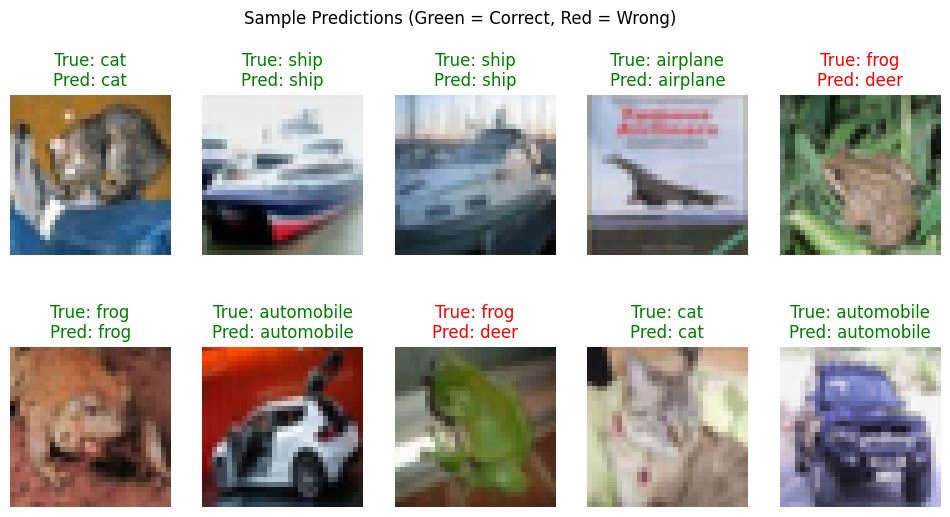

In [8]:
# STEP 7: Show Sample Predictions

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    true_label = class_names[int(y_test[i])]
    pred_label = class_names[y_pred_classes[i]]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.suptitle("Sample Predictions (Green = Correct, Red = Wrong)")
plt.show()
